ValueError: Invalid RGBA argument: 'viridian'

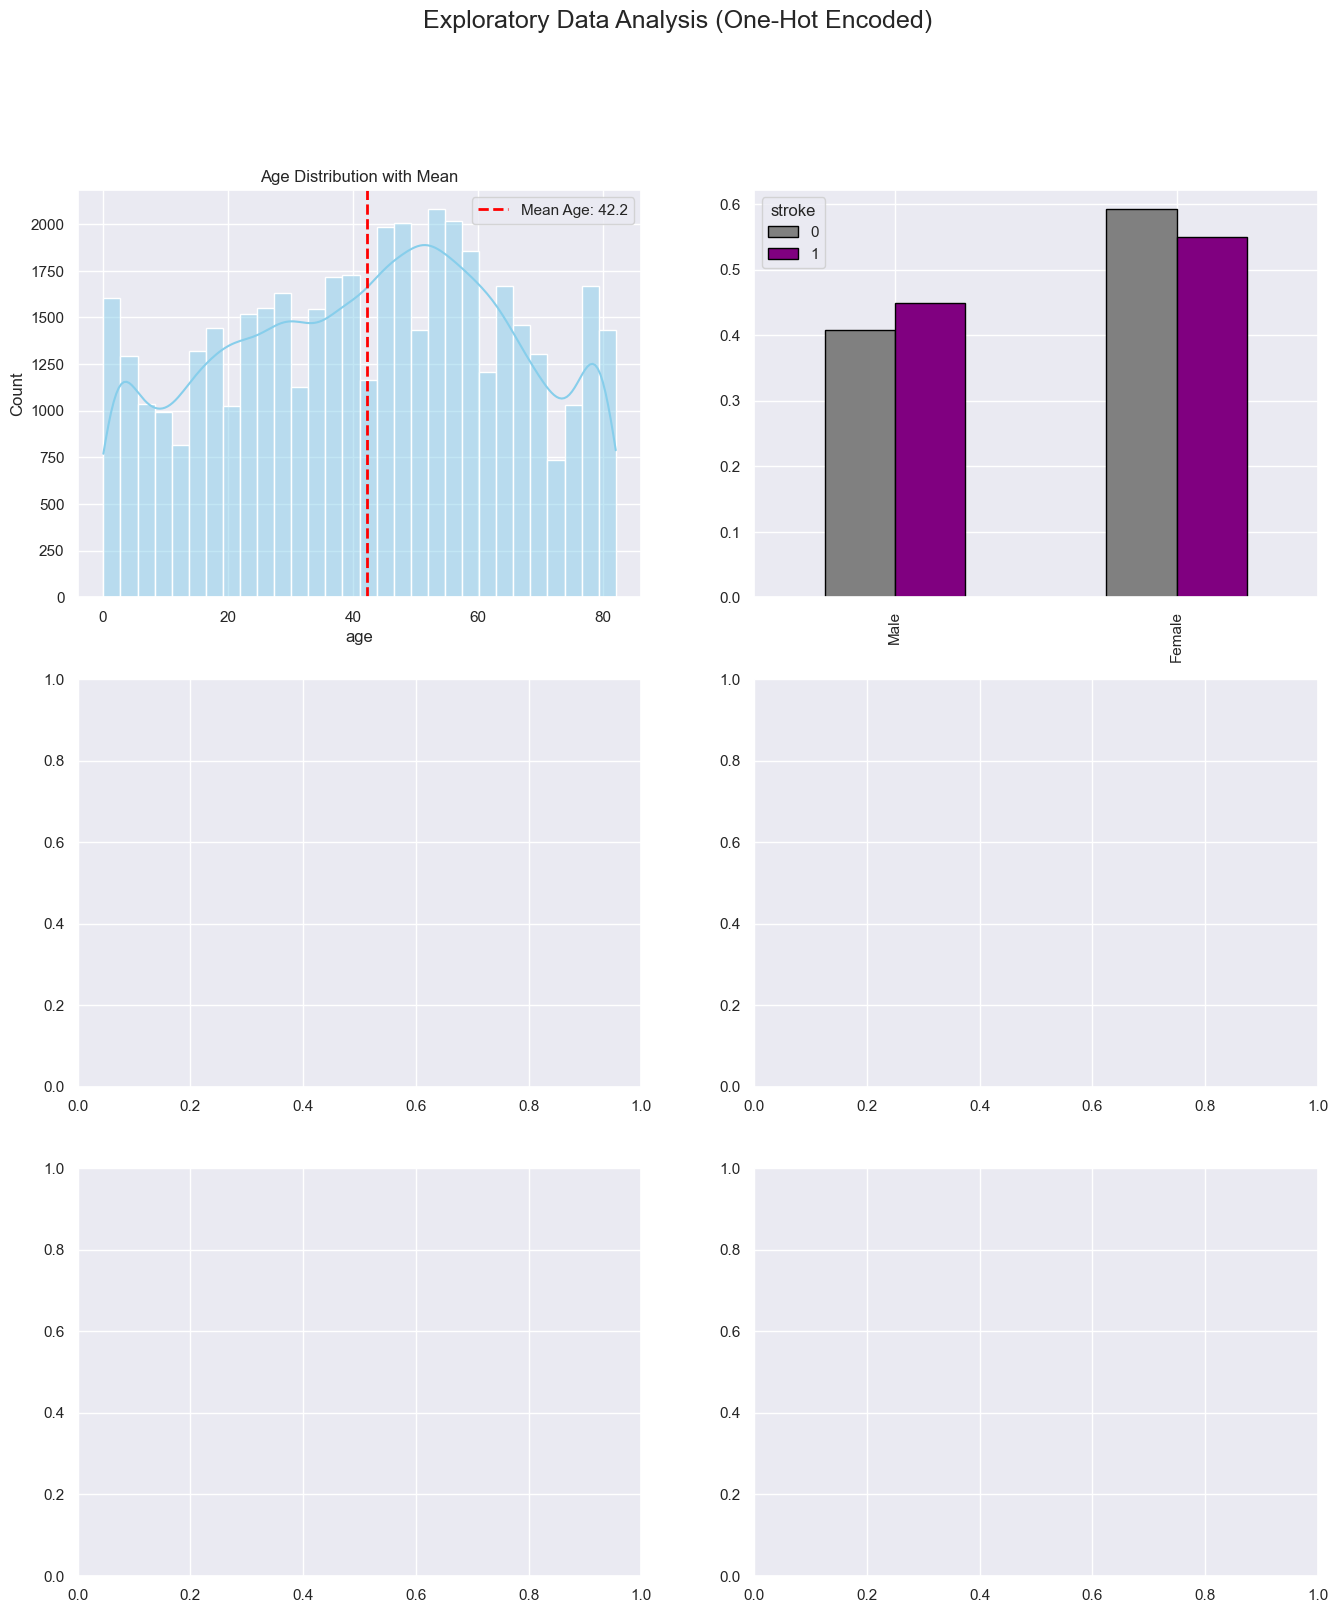

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cleaned.csv')
sns.set(style='darkgrid')

fig, axes = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle("Exploratory Data Analysis (One-Hot Encoded)", fontsize=18)

# Age Distribution with Mean Line
mean_age = df['age'].mean()
sns.histplot(data=df, x='age', bins=30, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].axvline(mean_age, color='red', linestyle='--', linewidth=2, label=f'Mean Age: {mean_age:.1f}')
axes[0, 0].set_title('Age Distribution with Mean')
axes[0, 0].legend()

# Gender vs Stroke (Color-coded by Gender)
gender_stroke_both = df.groupby('stroke')[['gender_Male', 'gender_Female']].mean()
gender_stroke_both.columns = ['Male', 'Female']
gender_stroke_both = gender_stroke_both.T

gender_colors = ['green', 'crimson'] 

gender_stroke_both.plot(kind='bar', ax=axes[0, 1], color=['gray', 'purple'], edgecolor='black')
for i, bar_group in enumerate(axes[0, 1].containers):
    for bar in bar_group:
        bar.set_facecolor(gender_colors[i])  # i=0: Male, i=1: Female

axes[0, 1].set_title('Proportion of Gender by Stroke Status')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Proportion')
axes[0, 1].legend(title='Stroke', labels=['No Stroke', 'Stroke'])

# Add annotations
for p in axes[0, 1].patches:
    height = p.get_height()
    axes[0, 1].annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height + 0.01),
                        ha='center', va='bottom', fontweight='bold')

# BMI vs Glucose colored by stroke
sns.scatterplot(data=df, x='bmi', y='avg_glucose_level', hue='stroke', ax=axes[1, 0], palette='coolwarm')
axes[1, 0].set_title('BMI vs Glucose Level (Stroke Highlighted)')

# Smoking Status Distribution
smoking_cols = ['smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']
smoke_counts = df[smoking_cols].sum().rename(lambda x: x.replace('smoking_status_', ''))
smoke_counts.plot(kind='bar', ax=axes[1, 1], color='lightseagreen')
axes[1, 1].set_title('Smoking Status Distribution')
axes[1, 1].tick_params(axis='x', rotation=30)
for i, v in enumerate(smoke_counts):
    axes[1, 1].text(i, v + 5, int(v), ha='center', fontweight='bold')

# Stroke by Hypertension
sns.countplot(data=df, x='hypertension', hue='stroke', ax=axes[2, 0], palette='muted')
axes[2, 0].set_title('Stroke by Hypertension Status')
axes[2, 0].set_xticklabels(['No', 'Yes'])

# Correlation Heatmap
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap='coolwarm', ax=axes[2, 1])
axes[2, 1].set_title('Feature Correlation Heatmap')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()
